# CS 109A/STAT 121A/AC 209A/CSCI E-109A: 
# Midterm - 2017

**Harvard University**<br/>
**Fall 2017**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine

---

### INSTRUCTIONS


- You must submit the Midterm on your own. ** No group submissions are allowed**. You may use any print or online resources but ** you may not work or consult with others**.
- Restart the kernel and run the whole notebook again before you submit. 
- Please submit both a notebook and a pdf.
 

---


## Flight Delays

The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled, and diverted flights are published in DOT's monthly Air Travel Consumer Report and in this dataset of 2015 flight delays and cancellations.


## Data
Each entry of the flights.csv file corresponds to a flight.  More than 5,800,000 flights were recorded in 2015. These flights are described according to 31 variables. Further details of these variables can be found <a href='https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time'>here</a>, if you are interested (not needed to answer these questions). 


 

|          Name          | Type | DESCRIPTION |
|--------------------------------|---|----------------------------------------------------------------------|
| DATE                     | object | The date in python datetime format |
| MONTH                     | int64 | The month of the year(1-12) |
| DAY                       | int64 | The day of the month |
| DAY_OF_WEEK               | int64 | The day of the week(1-7, MON-SUN) |
| AIRLINE                  | object | An identifier for the airline |
| FLIGHT_NUMBER             | int64 | The flight number |
| TAIL_NUMBER              | object | The tail number (aircraft) corresponding to this flight |
| ORIGIN_AIRPORT           | object | The code for origin airport |
| DESTINATION_AIRPORT      | object | The code for destination airport |
| SCHED_DEP                | object | The departure time in python datetime.time format |
| SCHED_ARR                | object | The arrival time in python datetime.time format |
| DEPARTURE_DELAY         |  float64| The delay incurred at the origin  (mins) |
| ARRIVAL_DELAY           | float64 | The delay when the flight reached the (mins) destination |
| DISTANCE                  | int64 | Distance in miles between origin and destination |
| SCHEDULED_TIME          | float64 | Scheduled time of flight (minutes) |
| ELAPSED_TIME            | float64 | Actual time of flight (minutes) |
| AIR_SYSTEM_DELAY        | float64 | What part of the delay was NASD?(mins) |
| SECURITY_DELAY          | float64 | What part of the delay was due to security problems? (mins) |
| AIRLINE_DELAY           | float64 | What part of the delay is due to the airline? (mins) |
| LATE_AIRCRAFT_DELAY     | float64 | What part of the delay is due to previous flight(s) being late(mins) |
| WEATHER_DELAY           | float64 | Delay due to extreme weather events(min) |

You can read more about the various weather delays [here](https://www.rita.dot.gov/bts/help/aviation/html/understanding.html) if you are so inclined.



## Data/Caveats

The data file, flights.csv, is found <a href="https://drive.google.com/file/d/0B9dVesTppCgHY0IwZHk3SGhjd00/view?usp=sharing">here</a> (note, it is about 70MB). 

This data is already preprocessed, reduced, partially cleaned and therefore not identical to the original dataset.

## Problem Description

We will build two separate models: one model that classifies whether a flight will be delayed and a second model that predicts the length of delay given that a flight is truly delayed. Only consider models taught in class so far. 

** Consider the following: **
This is a large dataset; think of strategies on how to solve this problem. Create a manageable subsample of the data that you can use to train and test/validate, but eventually you should predict on all the data (excluding the training set).

### Questions
1. (5pts) Create a new variable, `DELAY_OR_NOT`: a boolean/indicator variable which indicates any arrival delay under 15 mins as a 0, and any delay at or above 15 mins as a 1 (`ARRIVAL_DELAY >= 15`).
2. (5pts) Make sure you understand the data variable descriptions before you start the analysis. Consider all the columns and determine and list which of these predictors should not be used. 
3. (15pts) Perform EDA to gain intuition of the factors that affect delay and provide visuals: do delays vary across airlines, or time of departure, or airport (do, at the very least, Chicago (ORD), Boston (BOS), and your favorite another airport), or airport traffic?
4. (20pts) Build a classification model that classifies delays according to `DELAY_OR_NOT`. This is an unbalanced dataset, thus consider the appropriate performance metric when reporting your results. 
5. (5pts) Given your model, comment on the importance of factors as related to whether a flight is delayed.
6. (5pts) Evaluate your model(s) on your test set, and finally provide a visual to show which airlines are predicted to have the most delays using all the data excluding the training and test set. 
7. (15pts) Build a regression model that predicts the length of delay (on the log scale) given that a flight is truly delayed.
8. (20pts) Write a report (in the last markdown cell in your notebook with your findings (without code)). Describe the main design decisions you have made with justifications. Clearly explain your methodology and results. This should not be more than 300 words. You may use up to 5 diagrams.

## Deliverable: 
A well presented notebook with well structured and documented code to answer questions 1-7 (plus additional questions for 209 students) with brief explanations and/or clarifications (10pts for overall presentation). The last cell should contain the report for question 8.



## Hints
1. For the classification model, an AUC of approximately 0.6 should be your base model. 
2. $R^2>0.03$ for the regression is good, $R^2>0.05$ very good, and $R^2>0.1$ is impressive (measured on the log scale). 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import discriminant_analysis
from datetime import datetime
from sklearn.linear_model import LinearRegression

In [2]:
dataframe = pd.read_csv("cs109a_midterm.csv")

In [3]:
df = dataframe.copy()
df.head()

,DATE,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,...,DEPARTURE_DELAY,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015-09-19,9,19,6,AA,394,N3FMAA,ORD,LGA,07:15:00,...,9.0,1.0,733,135.0,127.0,NaN,NaN,NaN,NaN,NaN
1,2015-10-28,10,28,3,AA,375,N4YDAA,11298,13342,20:15:00,...,0.0,-31.0,853,149.0,118.0,NaN,NaN,NaN,NaN,NaN
2,2015-08-19,8,19,3,MQ,3648,N512MQ,XNA,ORD,12:22:00,...,-1.0,-21.0,522,108.0,88.0,NaN,NaN,NaN,NaN,NaN
3,2015-12-01,12,1,2,WN,4096,N912WN,PHX,BWI,11:20:00,...,11.0,-14.0,1999,260.0,235.0,NaN,NaN,NaN,NaN,NaN
4,2015-09-15,9,15,2,WN,285,N7718B,MCI,DEN,14:10:00,...,-4.0,-12.0,533,105.0,97.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(804941, 21)

In [5]:
# Question 1: create indicator for arrival delay at or above 15 mins
df['DELAY_OR_NOT']=(df['ARRIVAL_DELAY']>=15)*1

In [6]:
df.head()

,DATE,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,...,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAY_OR_NOT
0,2015-09-19,9,19,6,AA,394,N3FMAA,ORD,LGA,07:15:00,...,1.0,733,135.0,127.0,NaN,NaN,NaN,NaN,NaN,0
1,2015-10-28,10,28,3,AA,375,N4YDAA,11298,13342,20:15:00,...,-31.0,853,149.0,118.0,NaN,NaN,NaN,NaN,NaN,0
2,2015-08-19,8,19,3,MQ,3648,N512MQ,XNA,ORD,12:22:00,...,-21.0,522,108.0,88.0,NaN,NaN,NaN,NaN,NaN,0
3,2015-12-01,12,1,2,WN,4096,N912WN,PHX,BWI,11:20:00,...,-14.0,1999,260.0,235.0,NaN,NaN,NaN,NaN,NaN,0
4,2015-09-15,9,15,2,WN,285,N7718B,MCI,DEN,14:10:00,...,-12.0,533,105.0,97.0,NaN,NaN,NaN,NaN,NaN,0


Question 2: (5pts) Make sure you understand the data variable descriptions before you start the analysis. Consider all the columns and determine and list which of these predictors should not be used.

In [7]:
print("Unique flight numbers: ", df['FLIGHT_NUMBER'].unique().size)
print("Unique tail numbers: ", df['TAIL_NUMBER'].unique().size)

Unique flight numbers:  6754
Unique tail numbers:  4819


DEPARTURE_DELAY, ELAPSED_TIME, AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, and WEATHER_DELAY should not be used. We are trying to determine whether a flight will be delayed, and if so, how long it will be delayed, so we are limited to the data that can be collected before the plane takes off.

We also won't use DATE because the same information is encoded in the MONTH and DAY predictors. And finally, we won't use FLIGHT_NUMBER or TAIL_NUMBER because they are categorical variables with too many categories. It's not worth it to add 10,000 binary predictors just in case one particular flight pattern or aircraft is extremely influential on whether or not a flight is delayed.

Question 3: (15pts) 

Perform EDA to gain intuition of the factors that affect delay and provide visuals: do delays vary across airlines, or time of departure, or airport (do, at the very least, Chicago (ORD), Boston (BOS), and your favorite another airport), or airport traffic?

In [8]:
# proportion of flights delayed by airline
delayed_prop = {}
delayed_prop['airline'] = df.groupby(['AIRLINE'])['DELAY_OR_NOT'].sum()/df.groupby(['AIRLINE'])['DELAY_OR_NOT'].count()

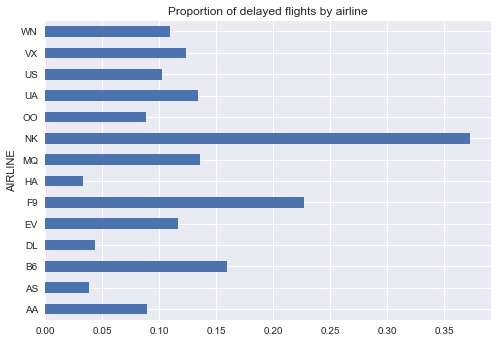

In [9]:
delayed_prop['airline'] = df.groupby(['AIRLINE'])['DELAY_OR_NOT'].sum()/df.groupby(['AIRLINE'])['DELAY_OR_NOT'].count()
delayed_prop['airline'].plot(kind="barh", title="Proportion of delayed flights by airline")

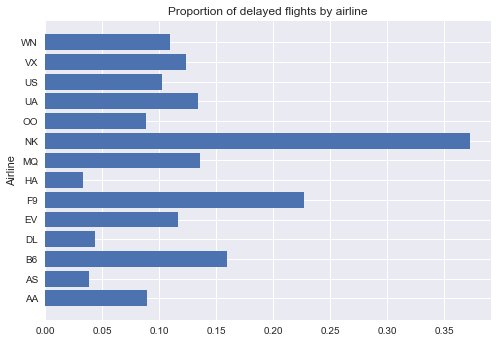

In [10]:
airlines = delayed_prop['airline'].index
nums = np.arange(len(airlines))
plt.barh(nums, delayed_prop['airline'].values)
ticks = plt.yticks(nums,airlines)
plt.title("Proportion of delayed flights by airline")
plt.ylabel("Airline")

Most airlines seem to have approximately 10% of their flights delayed, but NK and F9 are noticeable outliers with much higher proportions, while HA, DL, and AS have smaller proportions.

In [11]:
# top 50 airports by number of flights originating from there
topairport = df['ORIGIN_AIRPORT'].value_counts()[:50].index

delayed_prop['origin_airport'] = df.groupby(['ORIGIN_AIRPORT'])['DELAY_OR_NOT'].sum()/df.groupby(['ORIGIN_AIRPORT'])['DELAY_OR_NOT'].count()
delayed_prop['top_origin_airport'] = delayed_prop['origin_airport'][topairport]

In [12]:
delayed_prop['dest_airport'] = df.groupby(['DESTINATION_AIRPORT'])['DELAY_OR_NOT'].sum()/df.groupby(['DESTINATION_AIRPORT'])['DELAY_OR_NOT'].count()
delayed_prop['top_dest_airport'] = delayed_prop['dest_airport'][topairport]

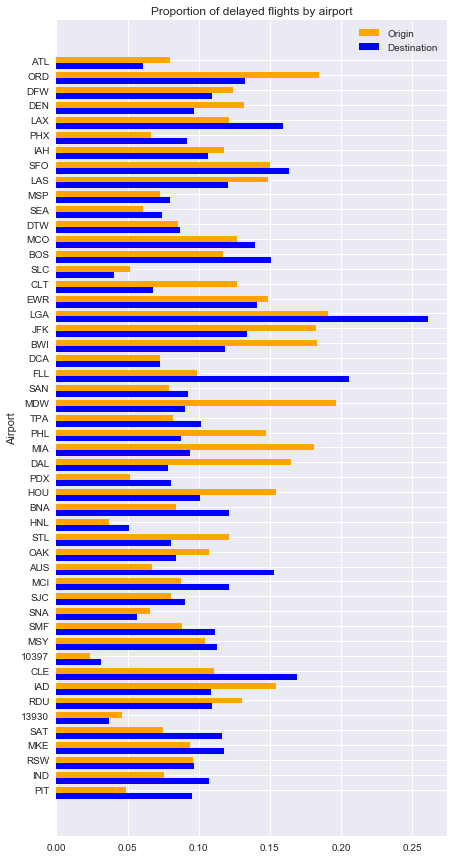

In [13]:
width = 0.4
fig, ax = plt.subplots(figsize=(7,15))
nums = np.arange(len(topairport))
ax.barh(nums, delayed_prop['top_origin_airport'].values, width, label = "Origin", color='orange')
ax.barh(nums+width, delayed_prop['top_dest_airport'].values, width, label = "Destination", color='blue')
ticks = plt.yticks(nums,topairport)
ax.set_title("Proportion of delayed flights by airport")
ax.legend(loc='best')
plt.ylabel("Airport")
plt.gca().invert_yaxis()

In [14]:
print("Mean proportion of delayed flights by origin airport:", delayed_prop['top_origin_airport'].values.mean())
print("Mean proportion of delayed flights by dest airport:", delayed_prop['top_dest_airport'].values.mean())

Mean proportion of delayed flights by origin airport: 0.108007260017
Mean proportion of delayed flights by dest airport: 0.10618870124


For this plot, I selected the top 50 airports by number of flights originating from there. The mean proportion of delayed flights by airport is 0.11, whether the airport is the origin or the destination. Many airports have approximately equal proportions of delayed flights by origin and destination, with some exceptions. LGA has the noticeably highest proportion of delayed flights by destination, and one of the highest proportions by origin. The second highest proportion of delayed flights by destination airport is FLL, but its proportion by origin is only half of its proportion by destination.

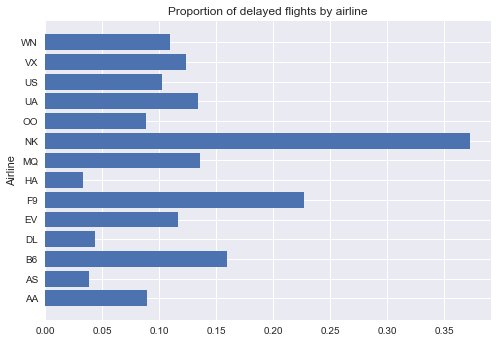

In [15]:
airlines = delayed_prop['airline'].index
nums = np.arange(len(airlines))
plt.barh(nums, delayed_prop['airline'].values)
ticks = plt.yticks(nums,airlines)
plt.title("Proportion of delayed flights by airline")
plt.ylabel("Airline")

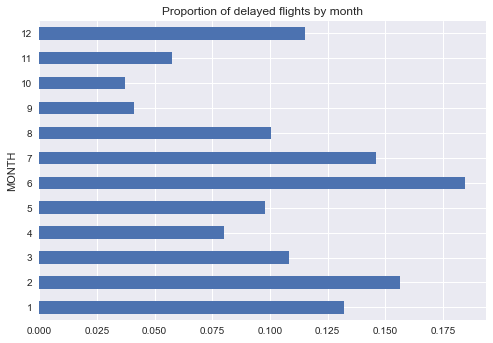

In [16]:
delayed_prop['month'] = df.groupby(['MONTH'])['DELAY_OR_NOT'].sum()/df.groupby(['MONTH'])['DELAY_OR_NOT'].count()
delayed_prop['month'].plot(kind="barh", title="Proportion of delayed flights by month")

In [17]:
delayed_prop['month'].describe()

count    12.000000
mean      0.104700
std       0.045836
min       0.037127
25%       0.074243
50%       0.104499
75%       0.135525
max       0.184443
Name: DELAY_OR_NOT, dtype: float64

The proportion of delayed flights varies significantly by month, with a minimum of 0.037 in October and a maximum of 0.184 in June.

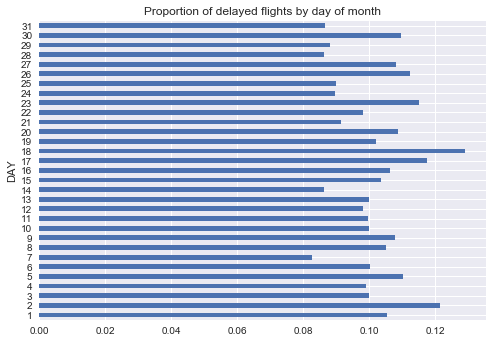

In [18]:
delayed_prop['day'] = df.groupby(['DAY'])['DELAY_OR_NOT'].sum()/df.groupby(['DAY'])['DELAY_OR_NOT'].count()
delayed_prop['day'].plot(kind="barh", title="Proportion of delayed flights by day of month")

In [19]:
delayed_prop['day'].describe()

count    31.000000
mean      0.101809
std       0.011077
min       0.082616
25%       0.094770
50%       0.100124
75%       0.108313
max       0.128818
Name: DELAY_OR_NOT, dtype: float64

The proportion of delayed flights stays close to the mean of 0.102 based on the day of the month.

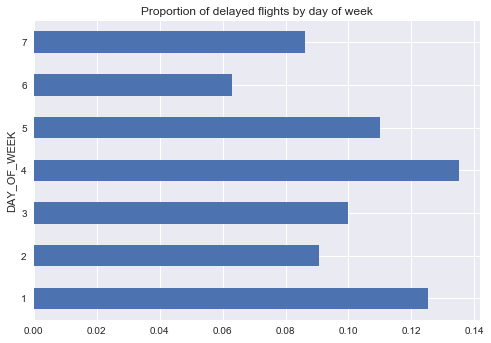

In [20]:
delayed_prop['week'] = df.groupby(['DAY_OF_WEEK'])['DELAY_OR_NOT'].sum()/df.groupby(['DAY_OF_WEEK'])['DELAY_OR_NOT'].count()
delayed_prop['week'].plot(kind="barh", title="Proportion of delayed flights by day of week")

In [21]:
delayed_prop['week'].describe()

count    7.000000
mean     0.101446
std      0.024466
min      0.063124
25%      0.088455
50%      0.099788
75%      0.117598
max      0.135107
Name: DELAY_OR_NOT, dtype: float64

The proportion of delayed flights varies slightly around the mean of 0.101 based on the day of the week, with a minimum on Saturday at 0.063 and a maximum on Thursday at 0.135.

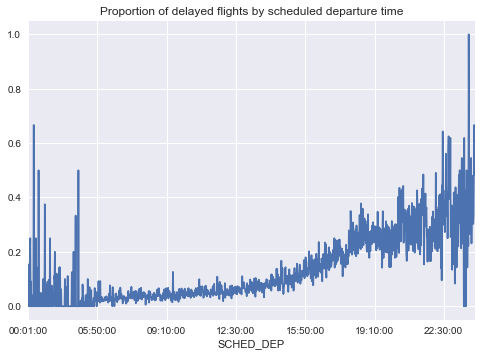

In [22]:
delayed_prop['sched_dep'] = df.groupby(['SCHED_DEP'])['DELAY_OR_NOT'].sum()/df.groupby(['SCHED_DEP'])['DELAY_OR_NOT'].count()
delayed_prop['sched_dep'].plot(title="Proportion of delayed flights by scheduled departure time")

The general upward trend of this plot shows that the later in the day a plane is scheduled to depart, the more likely it is to be delayed.

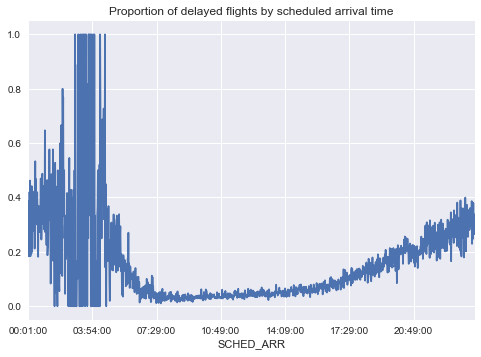

In [23]:
delayed_prop['sched_dep'] = df.groupby(['SCHED_ARR'])['DELAY_OR_NOT'].sum()/df.groupby(['SCHED_ARR'])['DELAY_OR_NOT'].count()
delayed_prop['sched_dep'].plot(title="Proportion of delayed flights by scheduled arrival time")

This plot shows that there is a lot of variability in the proportion of delayed flights arriving very early in the day, but around 7:30am, the variation is significantly reduced, and the proportion gradually increases throughout the day.

Question 4 (20 pts):

Build a classification model that classifies delays according to DELAY_OR_NOT. This is an unbalanced dataset, thus consider the appropriate performance metric when reporting your results.

In [24]:
# drop non-predictors
df_pred = df.copy()
resps = ['ARRIVAL_DELAY', 'DEPARTURE_DELAY', 'ELAPSED_TIME', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
tedious_preds = ['DATE', 'FLIGHT_NUMBER', 'TAIL_NUMBER']
non_preds = resps+tedious_preds
for non_pred in non_preds:
    df_pred = df_pred.drop(non_pred, axis=1)
df_pred.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,SCHED_ARR,DISTANCE,SCHEDULED_TIME,DELAY_OR_NOT
0,9,19,6,AA,ORD,LGA,07:15:00,10:30:00,733,135.0,0
1,10,28,3,AA,11298,13342,20:15:00,22:44:00,853,149.0,0
2,8,19,3,MQ,XNA,ORD,12:22:00,14:10:00,522,108.0,0
3,12,1,2,WN,PHX,BWI,11:20:00,17:40:00,1999,260.0,0
4,9,15,2,WN,MCI,DEN,14:10:00,14:55:00,533,105.0,0


In [25]:
print("Unique airports: ", df['ORIGIN_AIRPORT'].unique().size)

Unique airports:  628


There are too many unique airports, so let's keep the 50 airports with the highest numbers of flights originating from there, and convert all of the other airports to "Other".

In [26]:
# subset non-top airports into other
def other_airport(airport):
    if airport in list(topairport.values):
        return airport
    else:
        return "Other"

df_pred['ORIGIN_AIRPORT'] = df_pred['ORIGIN_AIRPORT'].apply(other_airport)
df_pred['DESTINATION_AIRPORT'] = df_pred['DESTINATION_AIRPORT'].apply(other_airport)
df_pred.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,SCHED_ARR,DISTANCE,SCHEDULED_TIME,DELAY_OR_NOT
0,9,19,6,AA,ORD,LGA,07:15:00,10:30:00,733,135.0,0
1,10,28,3,AA,Other,Other,20:15:00,22:44:00,853,149.0,0
2,8,19,3,MQ,Other,ORD,12:22:00,14:10:00,522,108.0,0
3,12,1,2,WN,PHX,BWI,11:20:00,17:40:00,1999,260.0,0
4,9,15,2,WN,MCI,DEN,14:10:00,14:55:00,533,105.0,0


The datetime.time type columns aren't truly continuous variables because 23:59 is just as close to 0:00 as it is to 23:58, so we will convert them into categorical predictors. We likely won't gain much from adding 24\*60 predictors, so lets one-hot encode them by hour instead.

In [27]:
# convert times to hours
def time_to_hr(hhmmss):
    [hours, minutes, seconds] = [int(x) for x in hhmmss.split(':')]
    return hours

df_pred['SCHED_DEP'] = df_pred['SCHED_DEP'].apply(time_to_hr)
df_pred['SCHED_ARR'] = df_pred['SCHED_ARR'].apply(time_to_hr)
df_pred.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,SCHED_ARR,DISTANCE,SCHEDULED_TIME,DELAY_OR_NOT
0,9,19,6,AA,ORD,LGA,7,10,733,135.0,0
1,10,28,3,AA,Other,Other,20,22,853,149.0,0
2,8,19,3,MQ,Other,ORD,12,14,522,108.0,0
3,12,1,2,WN,PHX,BWI,11,17,1999,260.0,0
4,9,15,2,WN,MCI,DEN,14,14,533,105.0,0


In [28]:
# one-hot encode categorical predictors
maybe_cat = ['MONTH', 'DAY', 'DAY_OF_WEEK', 'SCHED_DEP', 'SCHED_ARR']
categorical = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
df_dum = pd.get_dummies(df_pred, columns=categorical+maybe_cat, drop_first=True)
df_dum.head()

,DISTANCE,SCHEDULED_TIME,DELAY_OR_NOT,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,...,SCHED_ARR_14,SCHED_ARR_15,SCHED_ARR_16,SCHED_ARR_17,SCHED_ARR_18,SCHED_ARR_19,SCHED_ARR_20,SCHED_ARR_21,SCHED_ARR_22,SCHED_ARR_23
0,733,135.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,853,149.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,522,108.0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,1999,260.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,533,105.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [29]:
# split data into train and test
np.random.seed(9001)
msk = np.random.rand(len(df)) < 2/3
data_sub1 = df_dum[msk]
data_sub2 = df_dum[~msk]
msk2 = np.random.rand(len(data_sub1)) < 0.5
data_train = data_sub1[msk2]
data_test = data_sub1[~msk2]

In [30]:
# extract matrices from dataframe
dtrain_X = data_train.drop('DELAY_OR_NOT', axis=1)
dtest_X = data_test.drop('DELAY_OR_NOT', axis=1)

Xtrain = dtrain_X.values
Xtest = dtest_X.values
ytrain = data_train['DELAY_OR_NOT'].values
ytest = data_test['DELAY_OR_NOT'].values

In [31]:
# ovr logistic regression with l1 penalty and cross-validation
classif = {}
classif['logit_ovr'] = LogisticRegressionCV(penalty='l1', random_state=9001, multi_class='ovr', solver='liblinear', scoring='roc_auc')
classif['logit_ovr'].fit(Xtrain, ytrain)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l1', random_state=9001,
           refit=True, scoring='roc_auc', solver='liblinear', tol=0.0001,
           verbose=0)

In [32]:
classif['logit_ovr_train'] = classif['logit_ovr'].predict(Xtrain)
print("Confusion matrix: \n", confusion_matrix(ytrain, classif['logit_ovr_train']))
print("Train AUC score: ", metrics.roc_auc_score(ytrain, classif['logit_ovr_train']))
ovr_coeffs = pd.DataFrame(dict(feature=list(dtrain_X.columns), l1=classif['logit_ovr'].coef_.flatten()))
ovr_coeffs_drop = ovr_coeffs.drop(ovr_coeffs[ovr_coeffs.l1 != 0].index)
ovr_coeffs_drop

Confusion matrix: 
 [[238207   2603]
 [ 20547   6813]]
Train AUC score:  0.619101903062


,feature,l1


Question 5 (5 pts):

Given your model, comment on the importance of factors as related to whether a flight is delayed.

Above is an attempted list of predictors with a coefficient of 0 after L1 penalty regularization. There don't appear to be any predictors with a coefficient of 0, indicating that my model is influenced by every factor I used:
* Month
* Day of month
* Day of week
* Airline
* Origin airport
* Destination airport
* Hour of scheduled departure time
* Hour of scheduled arrival time
* Distance
* Scheduled length of flight

In [33]:
# Question 6: evaluate your model on your test set
classif['logit_ovr_test'] = classif['logit_ovr'].predict(Xtest)
print("Confusion matrix: \n", confusion_matrix(ytest, classif['logit_ovr_test']))
print("Test AUC score: ", metrics.roc_auc_score(ytest, classif['logit_ovr_test']))

Confusion matrix: 
 [[238336   2739]
 [ 20529   6837]]
Test AUC score:  0.61923697646


In [34]:
# extract data into matrices
dsub2_X = data_sub2.drop('DELAY_OR_NOT', axis=1)
Xsub2 = dsub2_X.values
ysub2 = data_sub2['DELAY_OR_NOT'].values

In [35]:
# make classifications
classif['logit_ovr_sub2'] = classif['logit_ovr'].predict(Xsub2)
dsub2_pred = dsub2_X.copy()
dsub2_pred['PRED_DELAY'] = classif['logit_ovr_sub2']

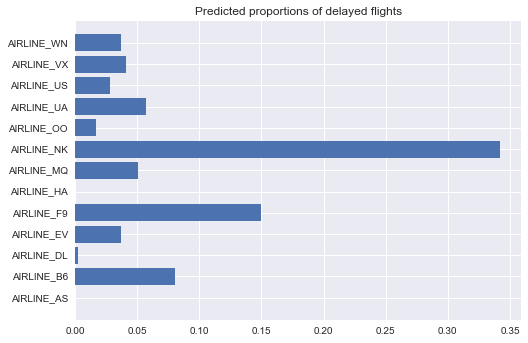

In [37]:
airline_cols = [col for col in dsub2_pred if col.startswith('AIRLINE')]
airline_props = []
for col in airline_cols:
    airline_props.append(dsub2_pred[dsub2_pred[col]==1]['PRED_DELAY'].sum()/dsub2_pred[dsub2_pred[col]==1]['PRED_DELAY'].count())

nums = np.arange(len(airline_cols))
plt.barh(nums, airline_props)
ticks = plt.yticks(nums,airline_cols)
plt.title("Predicted proportions of delayed flights")

In [38]:
# Question 7: build regression model to predict length of delay (log scale)
dfd = dataframe.copy()
dfd = dfd[dfd['ARRIVAL_DELAY']>=15]
dfd = dfd.reset_index(drop=True)
dfd.head()

,DATE,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,...,DEPARTURE_DELAY,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015-01-04,1,4,7,WN,958,N211WN,PHL,ATL,18:35:00,...,121.0,132.0,666,135.0,146.0,11.0,0.0,20.0,101.0,0.0
1,2015-07-22,7,22,3,EV,2682,N678AE,BRO,DFW,17:33:00,...,112.0,98.0,482,107.0,93.0,0.0,0.0,0.0,98.0,0.0
2,2015-03-23,3,23,1,OO,4629,N554CA,LAS,SEA,18:15:00,...,134.0,128.0,867,167.0,161.0,0.0,0.0,0.0,128.0,0.0
3,2015-03-12,3,12,4,US,2146,N951UW,LGA,BOS,14:00:00,...,-5.0,38.0,184,63.0,106.0,38.0,0.0,0.0,0.0,0.0
4,2015-04-27,4,27,1,EV,2557,N673AE,SHV,DFW,16:41:00,...,140.0,148.0,190,64.0,72.0,8.0,0.0,95.0,45.0,0.0


In [39]:
# drop non-predictors
dfd_pred = dfd.copy()
non_preds = ['DEPARTURE_DELAY','DATE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ELAPSED_TIME', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
for non_pred in non_preds:
    dfd_pred = dfd_pred.drop(non_pred, axis=1)

dfd_pred.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,SCHED_ARR,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME
0,1,4,7,WN,PHL,ATL,18:35:00,20:50:00,132.0,666,135.0
1,7,22,3,EV,BRO,DFW,17:33:00,19:20:00,98.0,482,107.0
2,3,23,1,OO,LAS,SEA,18:15:00,21:02:00,128.0,867,167.0
3,3,12,4,US,LGA,BOS,14:00:00,15:03:00,38.0,184,63.0
4,4,27,1,EV,SHV,DFW,16:41:00,17:45:00,148.0,190,64.0


In [ ]:
# subset non-top airports into other
dfd_pred['ORIGIN_AIRPORT'] = dfd_pred['ORIGIN_AIRPORT'].apply(other_airport)
dfd_pred['DESTINATION_AIRPORT'] = dfd_pred['DESTINATION_AIRPORT'].apply(other_airport)
dfd_pred.head()

In [ ]:
# convert time to hours
dfd_pred['SCHED_DEP'] = dfd_pred['SCHED_DEP'].apply(time_to_hr)
dfd_pred['SCHED_ARR'] = dfd_pred['SCHED_ARR'].apply(time_to_hr)

# convert arrival_delay to logarithmic scale
dfd_pred['ARRIVAL_DELAY'] = dfd_pred['ARRIVAL_DELAY'].apply(math.log)
dfd_pred.head()

In [ ]:
# one-hot encode categorical predictors
cats = ['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHED_DEP', 'SCHED_ARR']
dfd_dum = pd.get_dummies(dfd_pred, columns=cats, drop_first=True)
dfd_dum.head()

In [ ]:
# split data into train and test
np.random.seed(9001)
msk = np.random.rand(len(df_delay_dum)) < 0.5
dfd_train = dfd_dum[msk]
dfd_test = dfd_dum[~msk]

In [ ]:
dfd_train.head()

In [ ]:
# extract matrices from dataframe
dfdtrain_X = dfd_train.drop('ARRIVAL_DELAY', axis=1)
dfdtest_X = dfd_test.drop('ARRIVAL_DELAY', axis=1)

dfd = {}
dfd['Xtrain'] = dfdtrain_X.values
dfd['Xtest'] = dfdtest_X.values
dfd['ytrain'] = dfd_train['ARRIVAL_DELAY'].values
dfd['ytest'] = dfd_test['ARRIVAL_DELAY'].values

In [ ]:
ols = LinearRegression(fit_intercept=True)
ols.fit(dfd['Xtrain'], dfd['ytrain'])

print('OLS Train Score', ols.score(dfd['Xtrain'], dfd['ytrain']))
print('OLS Test Score', ols.score(dfd['Xtest'], dfd['ytest']))

Question 8 (20 pts):

Write a report (in the last markdown cell in your notebook with your findings (without code)). Describe the main design decisions you have made with justifications. Clearly explain your methodology and results. This should not be more than 300 words. You may use up to 5 diagrams.

I chose not to use data about flight number, tail number, origin/destination airports aside from the top 50 airports with the most flights originating from there, and the minute of scheduled arrival and departure time because I thought they wouldn't be useful enough to overcome the computational complexity they would add.

LASSO regression produces sparse solutions, meaning that some of the model parameters are estimated to be zero, so it can be used as a method of variable selection. I chose LASSO regression because it avoids the statistic problems that can arise in stepwise selection.

We also won't use DATE because the same information is encoded in the MONTH and DAY predictors. And finally, we won't use FLIGHT_NUMBER or TAIL_NUMBER because they are categorical variables with too many categories. It's not worth it to add 10,000 binary predictors just in case one particular flight pattern or aircraft is extremely influential on whether or not a flight is delayed.

There are too many unique (628) airports, so let's keep the 50 airports with the highest numbers of flights originating from there, and convert all of the other airports to "Other".

The datetime.time type columns aren't truly continuous variables because 23:59 is just as close to 0:00 as it is to 23:58, so we will convert them into categorical predictors. We likely won't gain much from adding 24\*60 predictors, so lets one-hot encode them by hour instead.